Panic Attack Dataset

This dataset is designed to help analyze panic attacks by exploring potential triggers, symptoms, and associated lifestyle factors. It includes details such as age, gender, panic attack frequency, duration, heart rate, sweating, chest pain, trembling, medical history, medication use, caffeine intake, exercise frequency, sleep patterns, alcohol consumption, smoking habits, therapy participation, and panic severity scores.

Although this dataset has many factors, I plan to examine the most common triggers for panic attacks and identify which gender in each age group is most affected by them.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

panic_attack_df = pd.read_csv('panic_attack_dataset.csv')

panic_attack_df.info()

panic_attack_df.describe()

panic_attack_df.head(5)
#There is not much data that needs to be cleaned here. The only portion that would need cleaning is the 'Medical History' 
#column, but since I will not be analyzing this portion I will leave it as is.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [5]:
#Exploring Missing Values 

panic_attack_df.isna().sum()

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64

By analyzing the missing values, I found that the 'Medical History' column is the only one with missing data in the dataset. This column represents patients' past history of mental illnesses. The missing values may be due to patients not having consulted a therapist or psychiatrist, resulting in a lack of documented proof of a mental illness.

In [6]:
panic_attack_df.dtypes

ID                          int64
Age                         int64
Gender                     object
Panic_Attack_Frequency      int64
Duration_Minutes            int64
Trigger                    object
Heart_Rate                  int64
Sweating                   object
Shortness_of_Breath        object
Dizziness                  object
Chest_Pain                 object
Trembling                  object
Medical_History            object
Medication                 object
Caffeine_Intake             int64
Exercise_Frequency          int64
Sleep_Hours               float64
Alcohol_Consumption         int64
Smoking                    object
Therapy                    object
Panic_Score                 int64
dtype: object

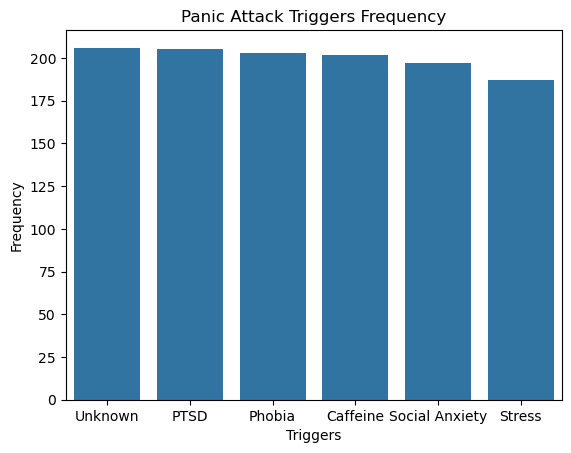

In [7]:
# Plot Panic Attack triggers 
trigger_counts = panic_attack_df['Trigger'].value_counts()

sns.barplot(x = trigger_counts.index, y = trigger_counts.values)
plt.title("Panic Attack Triggers Frequency")
plt.xlabel("Triggers")
plt.ylabel("Frequency")
plt.show()

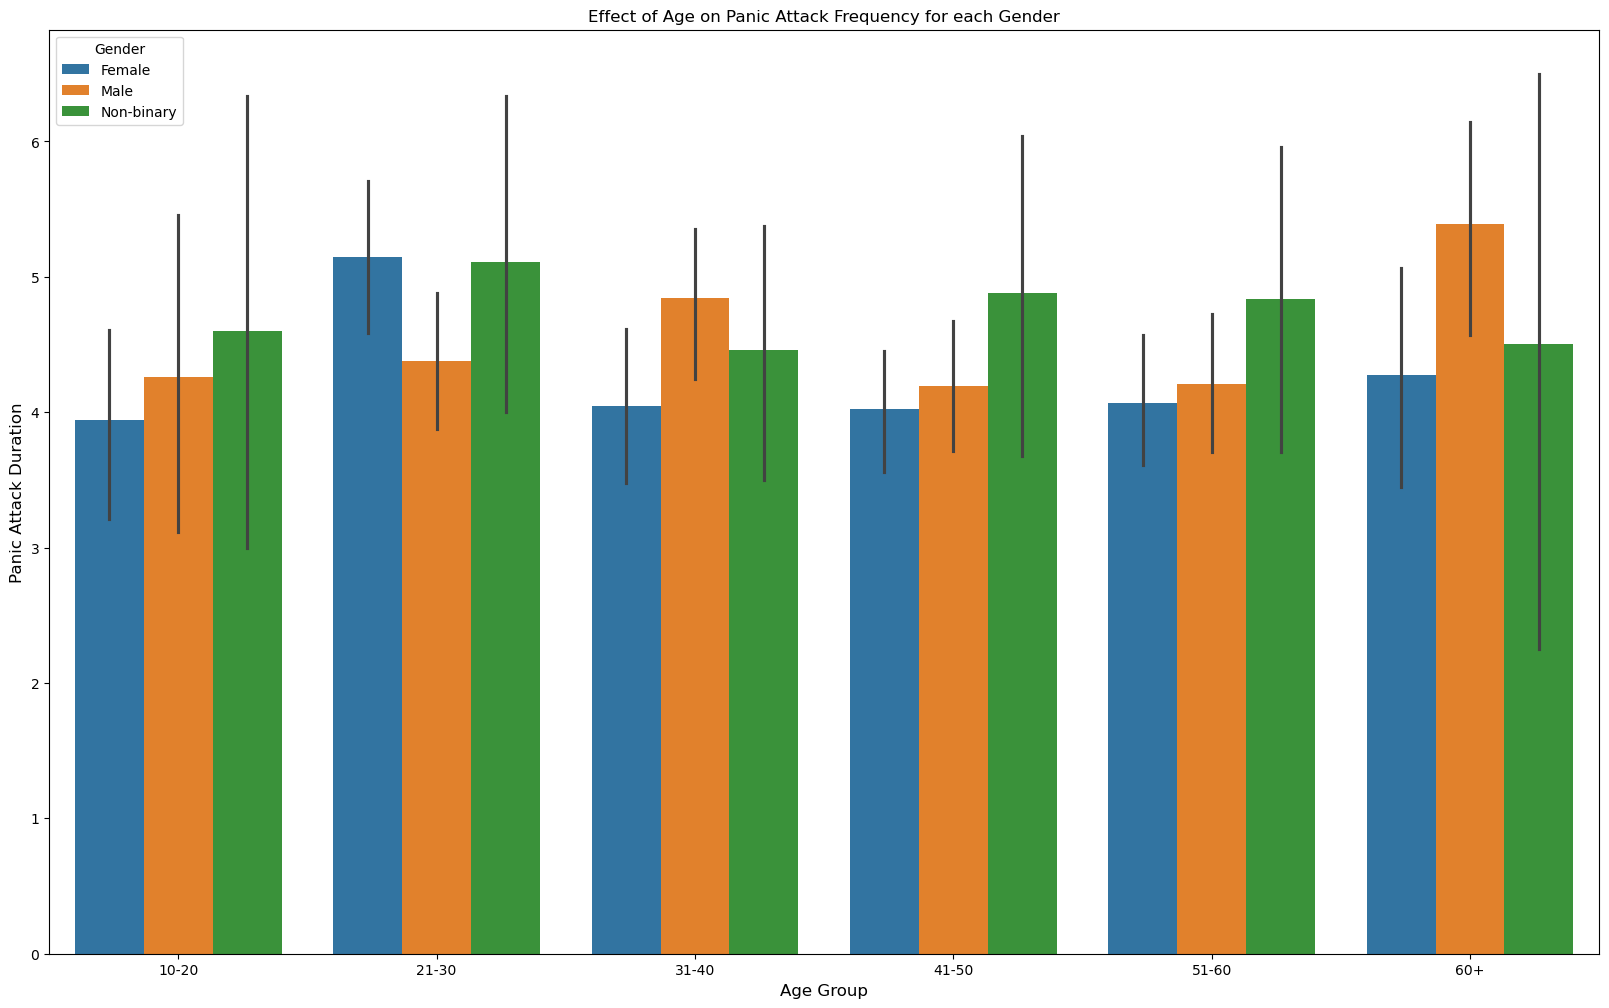

In [8]:
#Comparison of Frequency of Panic Attacks with gender and age groups
bin1=[10,20,30,40,50,60,70]
label1=['10-20','21-30','31-40','41-50','51-60','60+']
panic_attack_df['Age_Group'] = pd.cut(x = panic_attack_df['Age'], bins = bin1,labels = label1)

plt.figure(figsize=(20, 12))
sns.barplot(data=panic_attack_df, x='Age_Group',y='Panic_Attack_Frequency',hue='Gender')
plt.title("Effect of Age on Panic Attack Frequency for each Gender")
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Panic Attack Duration', fontsize=12)
plt.show()